###Problem Statement
#####The objective of the dataset is to diagnostically predict whether a patient has diabetes,based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. We can find several variables, some of them are independent(several medical predictor variables) and only one target dependent variable (Outcome).

In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print('Libraries imported')

Libraries imported


In [4]:
#Gathering data
data=pd.read_csv("/content/diabetes.csv")

In [6]:
#Analyzing the data
data.sample(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
22,7,196,90,0,0,39.8,0.451,41,1
608,0,152,82,39,272,41.5,0.270,27,0
317,3,182,74,0,0,30.5,0.345,29,1
561,0,198,66,32,274,41.3,0.502,28,1


In [7]:
#Statistics of the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
print('The shape of our dataset is',data.shape)
print('Number of columns',data.shape[1])
print('Number of rows',data.shape[0])

The shape of our dataset is (768, 9)
Number of columns 9
Number of rows 768


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
#framing a new name to all the columns in a list except the target feature.
data2=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [12]:
data[data2]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


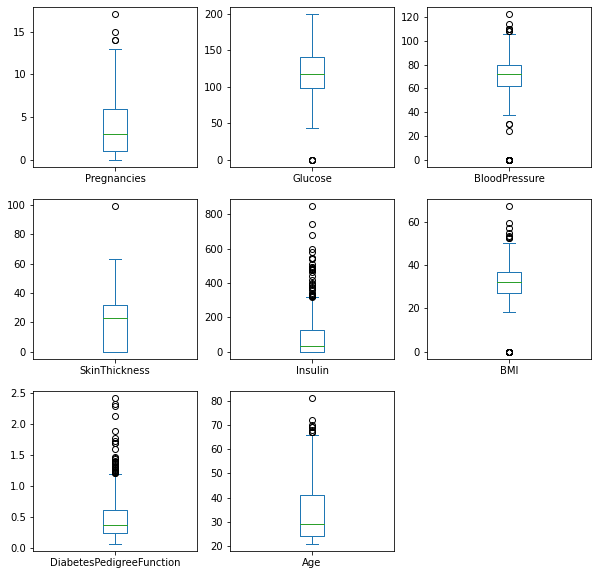

In [14]:
#barplot to project outliers.
data[data2].plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(3,3),figsize=(10,10))
plt.show()

In [15]:
d1=data[data2]
d1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [19]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
y=data['Outcome']
X=data.drop(['Outcome'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [20]:
#standardising using robust scaler because of outliers
from sklearn.preprocessing import RobustScaler
RC=RobustScaler()
X_train_scaled=RC.fit_transform(X_train)
X_test_scaled=RC.transform(X_test)

In [22]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=data2)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=data2)

In [23]:
X_train_scaled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.154723,0.096901,-0.173905,-0.072796,0.332923,-0.017688,0.268662,0.246312
std,0.664923,0.752679,1.080589,0.480958,0.881510,0.803947,0.892732,0.686173
min,-0.600000,-2.802395,-4.000000,-0.696970,-0.293542,-3.419525,-0.787293,-0.470588
25%,-0.400000,-0.407186,-0.555556,-0.696970,-0.293542,-0.535620,-0.345304,-0.294118
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,0.592814,0.444444,0.303030,0.706458,0.464380,0.654696,0.705882
max,2.800000,1.964072,2.777778,1.212121,5.530333,2.849604,5.682320,3.058824


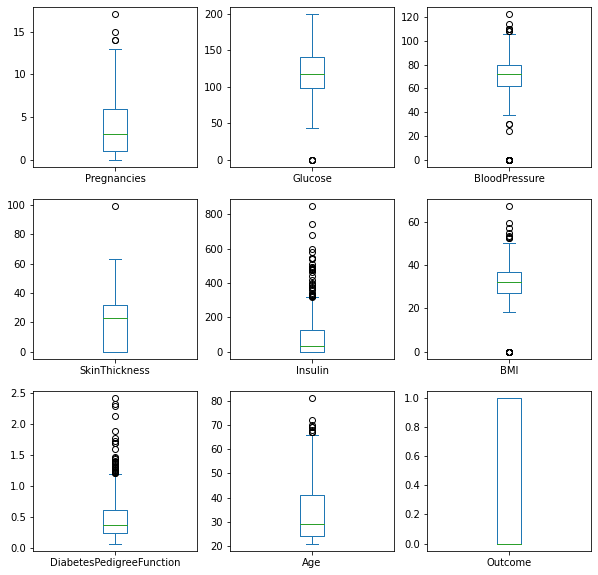

In [24]:
#boxplot to project outliers before standardizing
data.plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(3,3),figsize=(10,10))
plt.show()

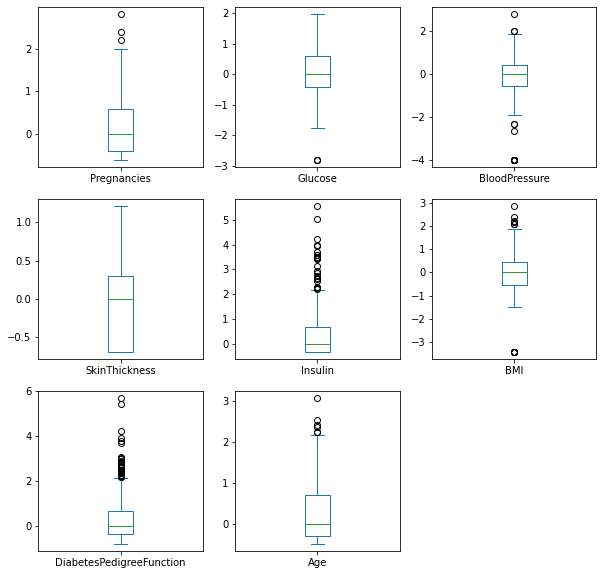

In [25]:
#boxplot to project outliers after standardizing
X_train_scaled[data2].plot(kind='box',subplots=True,sharex=False,sharey=False,layout=(3,3),figsize=(10,10))
plt.show()

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import recall_score, classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve , auc , f1_score 

In [46]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
y_trains= knn.predict(X_train_scaled) 

print(accuracy_score(y_train, y_trains)*100)
print(accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(classification_report(y_train, y_trains))

78.82736156351791
75.97402597402598
[[83 13]
 [24 34]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        96
           1       0.72      0.59      0.65        58

    accuracy                           0.76       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.76      0.75       154

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       404
           1       0.76      0.56      0.64       210

    accuracy                           0.79       614
   macro avg       0.78      0.73      0.75       614
weighted avg       0.78      0.79      0.78       614



In [38]:
#2nd method to find out the value of k
accuracy = []
for i in range(1,26):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled,y_train)
  accuracy.append(accuracy_score(y_test,knn.predict(X_test_scaled)))

In [39]:
len(accuracy)

25

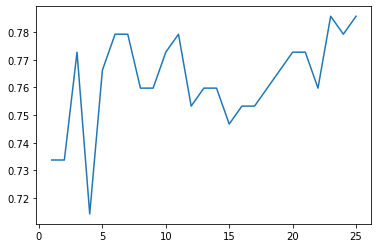

In [40]:
plt.plot(range(1,26),accuracy)

In [44]:
#accuracy score without scaling
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

In [45]:
#accuracy score of scaled data
knn=KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train_scaled,y_train)
y_pred=knn.predict(X_test_scaled)
accuracy_score(y_test,y_pred)

0.7857142857142857